In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_UFC_events').text
soup = BeautifulSoup(url,'lxml')

In [3]:
table_post = soup.find("table", {'id':'Past_events'})
fields = table_post.find_all('td')

number = []
Event = []
Date = []
Venue = []
Location = []
Attendence = []
Ref = []

for i in range(0, len(fields), 7):
    number.append(fields[i].text.strip())
    Event.append(fields[i+1].text.strip())
    Date.append(fields[i+2].text.strip())
    Venue.append(fields[i+3].text.strip())
    Location.append(fields[i+4].text.strip())
    Attendence.append(fields[i+5].text.strip())
    Ref.append(fields[i+6].text.strip())
        
df = pd.DataFrame(data=[number, Event, Date, Venue, Location, Attendence, Ref]).transpose()
df.columns = ['number', 'Event', 'Date', 'Venue', 'Location', 'Attendence', 'Ref']
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df_1 = df[['Date', 'Event', 'Location', 'Attendence']]

In [5]:
df_canmma = df_1[df_1['Location'].str.contains('Canada')]
print(df_canmma.shape)
df_canmma.head()

(28, 4)


,Date,Event,Location,Attendence
12,2018-12-08,UFC 231: Holloway vs. Ortega,"Toronto, Ontario, Canada","7004190390000000000♠19,039"
19,2018-10-27,UFC Fight Night: Volkan vs. Smith,"Moncton, New Brunswick, Canada","7003628200000000000♠6,282"
26,2018-07-28,UFC on Fox: Alvarez vs. Poirier 2,"Calgary, Alberta, Canada","7004106030000000000♠10,603"
50,2017-12-16,UFC on Fox: Lawler vs. dos Anjos,"Winnipeg, Manitoba, Canada","7003886200000000000♠8,862"
63,2017-09-09,UFC 215: Nunes vs. Shevchenko 2,"Edmonton, Alberta, Canada","7004162320000000000♠16,232"


In [6]:
df_tormma = df_canmma[df_canmma['Location'].str.contains('Toronto')]
df_tormma.insert(2, 'Attendance', [19039,18057,15504,16800,18303,55724], True)
df_tormma = df_tormma[['Date', 'Event', 'Location', 'Attendance']]
print(df_tormma.shape)
df_tormma

(6, 4)


,Date,Event,Location,Attendance
12,2018-12-08,UFC 231: Holloway vs. Ortega,"Toronto, Ontario, Canada",19039
90,2016-12-10,UFC 206: Holloway vs. Pettis,"Toronto, Ontario, Canada",18057
228,2013-09-21,UFC 165: Jones vs. Gustafsson,"Toronto, Ontario, Canada",15504
260,2012-09-22,UFC 152: Jones vs. Belfort,"Toronto, Ontario, Canada",16800
284,2011-12-10,UFC 140: Jones vs. Machida,"Toronto, Ontario, Canada",18303
302,2011-04-30,UFC 129: St-Pierre vs. Shields,"Toronto, Ontario, Canada",55724


In [7]:
df_monmma = df_canmma[df_canmma['Location'].str.contains('Montreal')]
df_monmma.insert(2, 'Attendance', [10154,20145,17249,23152,17647,21451,21390], True)
df_monmma = df_monmma[['Date', 'Event', 'Location', 'Attendance']]
print(df_monmma.shape)
df_monmma

(7, 4)


,Date,Event,Location,Attendance
158,2015-04-25,UFC 186: Johnson vs. Horiguchi,"Montreal, Quebec, Canada",10154
244,2013-03-16,UFC 158: St-Pierre vs. Diaz,"Montreal, Quebec, Canada",20145
255,2012-11-17,UFC 154: St-Pierre vs. Condit,"Montreal, Quebec, Canada",17249
310,2010-12-11,UFC 124: St-Pierre vs. Koscheck 2,"Montreal, Quebec, Canada",23152
325,2010-05-08,UFC 113: Machida vs. Shogun 2,"Montreal, Quebec, Canada",17647
347,2009-04-18,UFC 97: Redemption,"Montreal, Quebec, Canada",21451
368,2008-04-19,UFC 83: Serra vs. St-Pierre 2,"Montreal, Quebec, Canada",21390


In [8]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [9]:
df_tormma.describe()

,Attendance
count,6.000000
mean,23904.500000
std,15638.197144
min,15504.000000
25%,17114.250000
50%,18180.000000
75%,18855.000000
max,55724.000000


In [10]:
df_monmma.describe()

,Attendance
count,7.000000
mean,18741.142857
std,4338.757634
min,10154.000000
25%,17448.000000
50%,20145.000000
75%,21420.500000
max,23152.000000


In [11]:
df_gsp = df_canmma[df_1['Event'].str.contains('St.Pierre')]
df_gsp.insert(3, 'Attendance', [20145,17249,55724,23152,21390], True)
df_gsp = df_gsp[['Date','Event','Location','Attendance']]
df_gsp.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Date,Event,Location,Attendance
244,2013-03-16,UFC 158: St-Pierre vs. Diaz,"Montreal, Quebec, Canada",20145
255,2012-11-17,UFC 154: St-Pierre vs. Condit,"Montreal, Quebec, Canada",17249
302,2011-04-30,UFC 129: St-Pierre vs. Shields,"Toronto, Ontario, Canada",55724
310,2010-12-11,UFC 124: St-Pierre vs. Koscheck 2,"Montreal, Quebec, Canada",23152
368,2008-04-19,UFC 83: Serra vs. St-Pierre 2,"Montreal, Quebec, Canada",21390


In [12]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.dates as dates
df_tormma['Year'] = df_tormma.Date.dt.year
df_tormma.head()

,Date,Event,Location,Attendance,Year
12,2018-12-08,UFC 231: Holloway vs. Ortega,"Toronto, Ontario, Canada",19039,2018
90,2016-12-10,UFC 206: Holloway vs. Pettis,"Toronto, Ontario, Canada",18057,2016
228,2013-09-21,UFC 165: Jones vs. Gustafsson,"Toronto, Ontario, Canada",15504,2013
260,2012-09-22,UFC 152: Jones vs. Belfort,"Toronto, Ontario, Canada",16800,2012
284,2011-12-10,UFC 140: Jones vs. Machida,"Toronto, Ontario, Canada",18303,2011


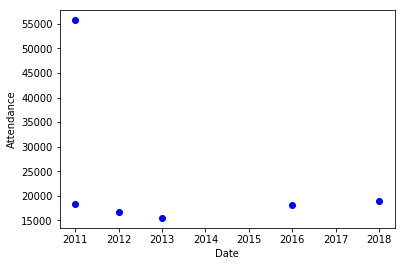

In [13]:
plt.scatter(df_tormma.Year, df_tormma.Attendance, color='blue')
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.show()

In [14]:
def func(x, a, b, c):
    return a + b*(np.log(x))
xdata = np.array(df_tormma['Year'].values)
ydata = np.array(df_tormma['Attendance'].values)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [15]:
print(" a = %f, b = %f" % (popt[0], popt[1]))

 a = 32238778.331544, b = -4234548.521278


In [16]:
x1 = np.linspace(2011, 2018, 100)
y1 = func(x1, *popt)

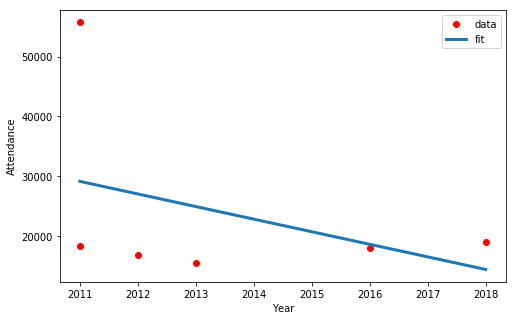

In [17]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x1,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Attendance')
plt.xlabel('Year')
plt.show()

In [18]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xdata = np.array(df_tormma['Year'].values)
ydata = np.array(df_tormma['Attendance'].values)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


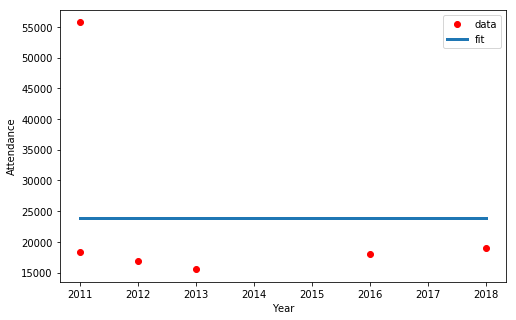

In [19]:
x1 = np.linspace(2011, 2018, 100)
y1 = func(x1, *popt)
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x1,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Attendance')
plt.xlabel('Year')
plt.show()

In [20]:
def func(x, a, b):
    return a + b*x
xdata = np.array(df_tormma['Year'].values)
ydata = np.array(df_tormma['Attendance'].values)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata)

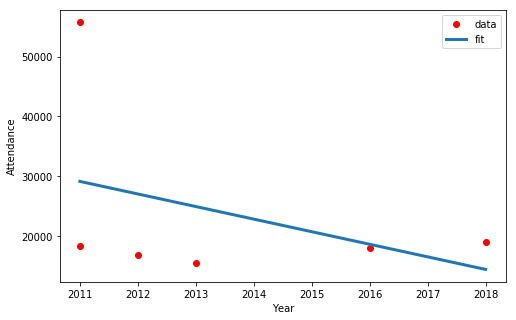

In [21]:
x1 = np.linspace(2011, 2018, 100)
y1 = func(x1, *popt)
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x1,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Attendance')
plt.xlabel('Year')
plt.show()

In [22]:
def func(x, a, b, c):
    return a + b*x + c*(x**2)
xdata = np.array(df_tormma['Year'].values)
ydata = np.array(df_tormma['Attendance'].values)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata)

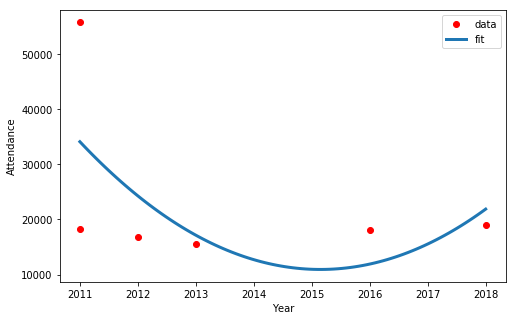

In [23]:
x1 = np.linspace(2011, 2018, 100)
y1 = func(x1, *popt)
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x1,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Attendance')
plt.xlabel('Year')
plt.show()

In [24]:
df_monmma['Year'] = df_monmma.Date.dt.year
print(df_monmma.dtypes)

Date          datetime64[ns]
Event                 object
Location              object
Attendance             int64
Year                   int64
dtype: object


In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df_monmma[['Year']])
train_y = np.asanyarray(df_monmma[['Attendance']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1381.]]
Intercept:  [ 2795932.14285714]


Text(0,0.5,'Attendance')

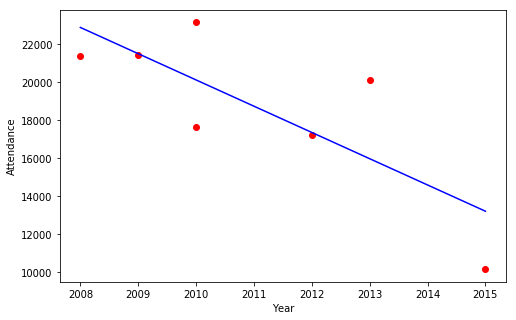

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df_monmma.Year, df_monmma.Attendance,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("Year")
plt.ylabel("Attendance")

In [27]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [28]:
CLIENT_ID = '1ONLQMRQ3SLLEDF3JG0CYGVNABT0EY3S4B3HDZIFO04QWKTR' # your Foursquare ID
CLIENT_SECRET = 'LAUWWUXTZVNSKBGVPNTF5AMZKFTETNTZXCNDFC4UXNUDEXHV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1ONLQMRQ3SLLEDF3JG0CYGVNABT0EY3S4B3HDZIFO04QWKTR
CLIENT_SECRET:LAUWWUXTZVNSKBGVPNTF5AMZKFTETNTZXCNDFC4UXNUDEXHV


In [29]:
search_query = 'Martial Arts MMA'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=1ONLQMRQ3SLLEDF3JG0CYGVNABT0EY3S4B3HDZIFO04QWKTR&client_secret=LAUWWUXTZVNSKBGVPNTF5AMZKFTETNTZXCNDFC4UXNUDEXHV&ll=43.653963,-79.387207&v=20180605&query=Martial Arts MMA&radius=10000&limit=100'

In [30]:
results = requests.get(url).json()

In [31]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'pluralName': 'Martial Arts...",False,56163504498ed1e1a310ca59,98 The Esplanade,CA,Toronto,Canada,NaN,1299,"[98 The Esplanade, Toronto ON M3M 2E9, Canada]","[{'lng': -79.37255144119263, 'label': 'display...",43.649088,-79.372551,NaN,M3M 2E9,ON,Elite Martial Arts Toronto,v-1553761119,NaN
1,"[{'primary': True, 'pluralName': 'Martial Arts...",False,5b5729c12463d80044eefe9c,403 Dundas Street W,CA,Toronto,Canada,NaN,652,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]","[{'lng': -79.39528584480286, 'label': 'display...",43.653528,-79.395286,NaN,M5T 1G6,ON,Innercity Martial Arts,v-1553761119,NaN
2,"[{'primary': True, 'pluralName': 'Student Cent...",False,4d7b9181f260a093d16729ba,146 Danforth Ave.,CA,Toronto,Canada,Broadview,3443,"[146 Danforth Ave. (Broadview), Toronto ON, Ca...","[{'lng': -79.357845, 'label': 'display', 'lat'...",43.676447,-79.357845,NaN,NaN,ON,Martial Arts,v-1553761119,NaN
3,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4bd3521641b9ef3bd4e0ffe5,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6019,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...","[{'lng': -79.375591133849, 'label': 'display',...",43.707378,-79.375591,NaN,M4G 3C1,ON,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,v-1553761119,122376308
4,"[{'primary': True, 'pluralName': 'Martial Arts...",False,513ce41490e7a7019e6b8e57,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1322,[40 Wellesley Street East (Yonge St. and Welle...,"[{'lng': -79.38289403915404, 'label': 'display...",43.665427,-79.382894,NaN,M4Y 1G2,ON,Sunrise Martial Arts,v-1553761119,NaN
5,"[{'primary': True, 'pluralName': 'Buildings', ...",False,52573cff498e964d7cf9b719,113 Annette At,CA,NaN,Canada,NaN,6275,"[113 Annette At, Canada]","[{'lng': -79.463981, 'label': 'display', 'lat'...",43.663592,-79.463981,NaN,NaN,NaN,Martial Arts,v-1553761119,NaN
6,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4f57e74fe4b08c9f86b10e89,2788 Bathurst Street,CA,Toronto,Canada,NaN,7210,"[2788 Bathurst Street, Toronto ON, Canada]","[{'lng': -79.428105, 'label': 'display', 'lat'...",43.711591,-79.428105,NaN,NaN,ON,Martial Arts College,v-1553761119,NaN
7,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4d9b85a6913a236a733fa108,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1373,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...","[{'lng': -79.3847667237342, 'label': 'display'...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,Openmat Mixed Martial Arts,v-1553761119,46003349
8,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4d9a06d177c18eece7497b92,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,2918,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...","[{'lng': -79.41045466175215, 'label': 'display...",43.674076,-79.410455,NaN,M5R 1V9,ON,Wu Xing Martial Arts,v-1553761119,NaN
9,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4c325b187cc0c9b6a02ff09a,570 Bloor Street,CA,Toronto,Canada,Bathurst,2341,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...","[{'lng': -79.41190481185913, 'label': 'display...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,Black Devil Mixed Martial Arts,v-1553761119,87186777


In [32]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Elite Martial Arts Toronto,Martial Arts Dojo,98 The Esplanade,CA,Toronto,Canada,NaN,1299,"[98 The Esplanade, Toronto ON M3M 2E9, Canada]","[{'lng': -79.37255144119263, 'label': 'display...",43.649088,-79.372551,NaN,M3M 2E9,ON,56163504498ed1e1a310ca59
1,Innercity Martial Arts,Martial Arts Dojo,403 Dundas Street W,CA,Toronto,Canada,NaN,652,"[403 Dundas Street W, Toronto ON M5T 1G6, Canada]","[{'lng': -79.39528584480286, 'label': 'display...",43.653528,-79.395286,NaN,M5T 1G6,ON,5b5729c12463d80044eefe9c
2,Martial Arts,Student Center,146 Danforth Ave.,CA,Toronto,Canada,Broadview,3443,"[146 Danforth Ave. (Broadview), Toronto ON, Ca...","[{'lng': -79.357845, 'label': 'display', 'lat'...",43.676447,-79.357845,NaN,NaN,ON,4d7b9181f260a093d16729ba
3,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts Dojo,1669 Bayview Avenue #200,CA,Toronto,Canada,NaN,6019,"[1669 Bayview Avenue #200, Toronto ON M4G 3C1...","[{'lng': -79.375591133849, 'label': 'display',...",43.707378,-79.375591,NaN,M4G 3C1,ON,4bd3521641b9ef3bd4e0ffe5
4,Sunrise Martial Arts,Martial Arts Dojo,40 Wellesley Street East,CA,Toronto,Canada,Yonge St. and Wellesley St.,1322,[40 Wellesley Street East (Yonge St. and Welle...,"[{'lng': -79.38289403915404, 'label': 'display...",43.665427,-79.382894,NaN,M4Y 1G2,ON,513ce41490e7a7019e6b8e57
5,Martial Arts,Building,113 Annette At,CA,NaN,Canada,NaN,6275,"[113 Annette At, Canada]","[{'lng': -79.463981, 'label': 'display', 'lat'...",43.663592,-79.463981,NaN,NaN,NaN,52573cff498e964d7cf9b719
6,Martial Arts College,Martial Arts Dojo,2788 Bathurst Street,CA,Toronto,Canada,NaN,7210,"[2788 Bathurst Street, Toronto ON, Canada]","[{'lng': -79.428105, 'label': 'display', 'lat'...",43.711591,-79.428105,NaN,NaN,ON,4f57e74fe4b08c9f86b10e89
7,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,CA,Toronto,Canada,Wellesley St.,1373,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y...","[{'lng': -79.3847667237342, 'label': 'display'...",43.666172,-79.384767,NaN,M4Y 1Z4,ON,4d9b85a6913a236a733fa108
8,Wu Xing Martial Arts,Martial Arts Dojo,"374 Dupont St, 2nd Floor",CA,Toronto,Canada,at Brunswick Ave,2918,"[374 Dupont St, 2nd Floor (at Brunswick Ave), ...","[{'lng': -79.41045466175215, 'label': 'display...",43.674076,-79.410455,NaN,M5R 1V9,ON,4d9a06d177c18eece7497b92
9,Black Devil Mixed Martial Arts,Martial Arts Dojo,570 Bloor Street,CA,Toronto,Canada,Bathurst,2341,"[570 Bloor Street (Bathurst), Toronto ON M5C 2...","[{'lng': -79.41190481185913, 'label': 'display...",43.665070,-79.411905,"Annex, Mirvish Village",M5C 2M7,ON,4c325b187cc0c9b6a02ff09a


In [33]:
df_torma = dataframe_filtered[['name', 'categories', 'address', 'city', 'country', 'lat', 'lng']]
df_torma

,name,categories,address,city,country,lat,lng
0,Elite Martial Arts Toronto,Martial Arts Dojo,98 The Esplanade,Toronto,Canada,43.649088,-79.372551
1,Innercity Martial Arts,Martial Arts Dojo,403 Dundas Street W,Toronto,Canada,43.653528,-79.395286
2,Martial Arts,Student Center,146 Danforth Ave.,Toronto,Canada,43.676447,-79.357845
3,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts Dojo,1669 Bayview Avenue #200,Toronto,Canada,43.707378,-79.375591
4,Sunrise Martial Arts,Martial Arts Dojo,40 Wellesley Street East,Toronto,Canada,43.665427,-79.382894
5,Martial Arts,Building,113 Annette At,NaN,Canada,43.663592,-79.463981
6,Martial Arts College,Martial Arts Dojo,2788 Bathurst Street,Toronto,Canada,43.711591,-79.428105
7,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,Toronto,Canada,43.666172,-79.384767
8,Wu Xing Martial Arts,Martial Arts Dojo,"374 Dupont St, 2nd Floor",Toronto,Canada,43.674076,-79.410455
9,Black Devil Mixed Martial Arts,Martial Arts Dojo,570 Bloor Street,Toronto,Canada,43.665070,-79.411905


In [34]:
df_torma = df_torma.dropna()
df_torma

,name,categories,address,city,country,lat,lng
0,Elite Martial Arts Toronto,Martial Arts Dojo,98 The Esplanade,Toronto,Canada,43.649088,-79.372551
1,Innercity Martial Arts,Martial Arts Dojo,403 Dundas Street W,Toronto,Canada,43.653528,-79.395286
2,Martial Arts,Student Center,146 Danforth Ave.,Toronto,Canada,43.676447,-79.357845
3,T.H.A Martial Arts & Kickboxing - Toronto Hapk...,Martial Arts Dojo,1669 Bayview Avenue #200,Toronto,Canada,43.707378,-79.375591
4,Sunrise Martial Arts,Martial Arts Dojo,40 Wellesley Street East,Toronto,Canada,43.665427,-79.382894
6,Martial Arts College,Martial Arts Dojo,2788 Bathurst Street,Toronto,Canada,43.711591,-79.428105
7,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,Toronto,Canada,43.666172,-79.384767
8,Wu Xing Martial Arts,Martial Arts Dojo,"374 Dupont St, 2nd Floor",Toronto,Canada,43.674076,-79.410455
9,Black Devil Mixed Martial Arts,Martial Arts Dojo,570 Bloor Street,Toronto,Canada,43.665070,-79.411905
10,Riverdale Martial Arts Centre,Martial Arts Dojo,838 Broadview Av.,Toronto,Canada,43.678782,-79.358518


In [35]:
a = df_torma.shape
print('The Number of Martial Arts Facility within 10km of Central Toronto is ', a[0])

The Number of Martial Arts Facility within 10km of Central Toronto is  32


In [36]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_torma.lat, df_torma.lng, df_torma.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [37]:
address = 'Montreal'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 45.4972159, -73.6103642.


In [38]:
CLIENT_ID = '1ONLQMRQ3SLLEDF3JG0CYGVNABT0EY3S4B3HDZIFO04QWKTR' # your Foursquare ID
CLIENT_SECRET = 'LAUWWUXTZVNSKBGVPNTF5AMZKFTETNTZXCNDFC4UXNUDEXHV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1ONLQMRQ3SLLEDF3JG0CYGVNABT0EY3S4B3HDZIFO04QWKTR
CLIENT_SECRET:LAUWWUXTZVNSKBGVPNTF5AMZKFTETNTZXCNDFC4UXNUDEXHV


In [39]:
search_query = 'MMA Martial Arts'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
venues = results['response']['venues']
dataframe2 = json_normalize(venues)
dataframe2

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'pluralName': 'Martial Arts...",False,532b1c33498e01dca79640b8,6968 St-Denis,CA,Montréal,Canada,NaN,4462,"[6968 St-Denis, Montréal QC H2S 2S4, Canada]","[{'lng': -73.612443271628, 'label': 'display',...",45.537279,-73.612443,H2S 2S4,QC,Montreal Martial Arts - Arts Martiaux Patenaud...,v-1553761120,81881707
1,"[{'primary': True, 'pluralName': 'Martial Arts...",False,515310e7e4b0d3abfd6fb9a1,750 Decarie,CA,Saint-Laurent,Canada,NaN,2789,"[750 Decarie, Saint-Laurent QC H4L 3L5, Canada]","[{'lng': -73.58059864389422, 'label': 'display...",45.511093,-73.580599,H4L 3L5,QC,Apex Martial Arts,v-1553761120,NaN
2,"[{'primary': True, 'pluralName': 'Martial Arts...",False,4c37d0f3dfb0e21ede92ada8,429 Mayor Street,CA,Montréal,Canada,NaN,2428,"[429 Mayor Street, Montréal QC H3A 1N9, Canada]","[{'lng': -73.581564, 'label': 'display', 'lat'...",45.505486,-73.581564,H3A 1N9,QC,Gelinas Academy of Mixed Martial Arts (GAMMA),v-1553761120,NaN
3,"[{'primary': True, 'pluralName': 'Athletics & ...",False,5211014511d2caa81d5ffffa,1121 Ste Catherine St W,CA,Montréal,Canada,NaN,2863,"[1121 Ste Catherine St W, Montréal QC, Canada]","[{'lng': -73.57382224918672, 'label': 'display...",45.499558,-73.573822,NaN,QC,Gelinas Academy Of Mixed Martial Arts,v-1553761120,NaN
4,"[{'primary': True, 'pluralName': 'Gyms or Fitn...",False,53f22bbb498e1b2420e19f19,4052 rue Wellington,CA,Verdun,Canada,de l'Eglise,5072,"[4052 rue Wellington (de l'Eglise), Verdun QC ...","[{'lng': -73.5669512, 'label': 'display', 'lat...",45.463313,-73.566951,H4G 1V3,QC,Uvolution Fitness & Arts Martiaux,v-1553761120,113453675
5,"[{'primary': True, 'pluralName': 'Martial Arts...",False,532b2487498e48ae5b004c28,"1505, boulevard Provencher",CA,Brossard,Canada,Pelletier,10850,"[1505, boulevard Provencher (Pelletier), Bross...","[{'lng': -73.47560564685101, 'label': 'display...",45.473251,-73.475606,J4W 1Z3,QC,Académie Arts Martiaux Brossard,v-1553761120,85491850


In [40]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe2_filtered = dataframe2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe2_filtered['categories'] = dataframe2_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe2_filtered.columns = [column.split('.')[-1] for column in dataframe2_filtered.columns]

dataframe2_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Montreal Martial Arts - Arts Martiaux Patenaud...,Martial Arts Dojo,6968 St-Denis,CA,Montréal,Canada,NaN,4462,"[6968 St-Denis, Montréal QC H2S 2S4, Canada]","[{'lng': -73.612443271628, 'label': 'display',...",45.537279,-73.612443,H2S 2S4,QC,532b1c33498e01dca79640b8
1,Apex Martial Arts,Martial Arts Dojo,750 Decarie,CA,Saint-Laurent,Canada,NaN,2789,"[750 Decarie, Saint-Laurent QC H4L 3L5, Canada]","[{'lng': -73.58059864389422, 'label': 'display...",45.511093,-73.580599,H4L 3L5,QC,515310e7e4b0d3abfd6fb9a1
2,Gelinas Academy of Mixed Martial Arts (GAMMA),Martial Arts Dojo,429 Mayor Street,CA,Montréal,Canada,NaN,2428,"[429 Mayor Street, Montréal QC H3A 1N9, Canada]","[{'lng': -73.581564, 'label': 'display', 'lat'...",45.505486,-73.581564,H3A 1N9,QC,4c37d0f3dfb0e21ede92ada8
3,Gelinas Academy Of Mixed Martial Arts,Athletics & Sports,1121 Ste Catherine St W,CA,Montréal,Canada,NaN,2863,"[1121 Ste Catherine St W, Montréal QC, Canada]","[{'lng': -73.57382224918672, 'label': 'display...",45.499558,-73.573822,NaN,QC,5211014511d2caa81d5ffffa
4,Uvolution Fitness & Arts Martiaux,Gym / Fitness Center,4052 rue Wellington,CA,Verdun,Canada,de l'Eglise,5072,"[4052 rue Wellington (de l'Eglise), Verdun QC ...","[{'lng': -73.5669512, 'label': 'display', 'lat...",45.463313,-73.566951,H4G 1V3,QC,53f22bbb498e1b2420e19f19
5,Académie Arts Martiaux Brossard,Martial Arts Dojo,"1505, boulevard Provencher",CA,Brossard,Canada,Pelletier,10850,"[1505, boulevard Provencher (Pelletier), Bross...","[{'lng': -73.47560564685101, 'label': 'display...",45.473251,-73.475606,J4W 1Z3,QC,532b2487498e48ae5b004c28


In [41]:
df_monma1 = dataframe2_filtered[['name', 'categories', 'address', 'city', 'country', 'lat', 'lng']]
df_monma1 = df_monma1.dropna()
df_monma1

,name,categories,address,city,country,lat,lng
0,Montreal Martial Arts - Arts Martiaux Patenaud...,Martial Arts Dojo,6968 St-Denis,Montréal,Canada,45.537279,-73.612443
1,Apex Martial Arts,Martial Arts Dojo,750 Decarie,Saint-Laurent,Canada,45.511093,-73.580599
2,Gelinas Academy of Mixed Martial Arts (GAMMA),Martial Arts Dojo,429 Mayor Street,Montréal,Canada,45.505486,-73.581564
3,Gelinas Academy Of Mixed Martial Arts,Athletics & Sports,1121 Ste Catherine St W,Montréal,Canada,45.499558,-73.573822
4,Uvolution Fitness & Arts Martiaux,Gym / Fitness Center,4052 rue Wellington,Verdun,Canada,45.463313,-73.566951
5,Académie Arts Martiaux Brossard,Martial Arts Dojo,"1505, boulevard Provencher",Brossard,Canada,45.473251,-73.475606


In [42]:
LIMIT2 = 2
search_query = 'MMA'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT2)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe3 = json_normalize(venues)
filtered_columns = ['name', 'categories'] + [col for col in dataframe3.columns if col.startswith('location.')] + ['id']
dataframe3_filtered = dataframe3.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe3_filtered['categories'] = dataframe3_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe3_filtered.columns = [column.split('.')[-1] for column in dataframe3_filtered.columns]

dataframe3_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,H2O MMA Gym,Martial Arts Dojo,6045 Boulevard Monk,CA,Montréal,Canada,Jolicoeur,2668,"[6045 Boulevard Monk (Jolicoeur), Verdun QC, C...","[{'lng': -73.59261054322653, 'label': 'display...",45.476728,-73.592611,QC,4d8bbafe37c6a14322b5b00c
1,Angry Monkey MMA,Boxing Gym,3700 St Patrick Suite 111C,CA,Montréal,Canada,NaN,3863,"[3700 St Patrick Suite 111C, Montréal QC, Canada]","[{'lng': -73.579295, 'label': 'display', 'lat'...",45.470194,-73.579295,QC,5756e790498e2982f60c90b1


In [43]:
df_monma2 = dataframe3_filtered[['name', 'categories', 'address', 'city', 'country', 'lat', 'lng']]
df_monma2

,name,categories,address,city,country,lat,lng
0,H2O MMA Gym,Martial Arts Dojo,6045 Boulevard Monk,Montréal,Canada,45.476728,-73.592611
1,Angry Monkey MMA,Boxing Gym,3700 St Patrick Suite 111C,Montréal,Canada,45.470194,-73.579295


In [44]:
df_monma = pd.concat([df_monma1, df_monma2], ignore_index=True)
df_monma

,name,categories,address,city,country,lat,lng
0,Montreal Martial Arts - Arts Martiaux Patenaud...,Martial Arts Dojo,6968 St-Denis,Montréal,Canada,45.537279,-73.612443
1,Apex Martial Arts,Martial Arts Dojo,750 Decarie,Saint-Laurent,Canada,45.511093,-73.580599
2,Gelinas Academy of Mixed Martial Arts (GAMMA),Martial Arts Dojo,429 Mayor Street,Montréal,Canada,45.505486,-73.581564
3,Gelinas Academy Of Mixed Martial Arts,Athletics & Sports,1121 Ste Catherine St W,Montréal,Canada,45.499558,-73.573822
4,Uvolution Fitness & Arts Martiaux,Gym / Fitness Center,4052 rue Wellington,Verdun,Canada,45.463313,-73.566951
5,Académie Arts Martiaux Brossard,Martial Arts Dojo,"1505, boulevard Provencher",Brossard,Canada,45.473251,-73.475606
6,H2O MMA Gym,Martial Arts Dojo,6045 Boulevard Monk,Montréal,Canada,45.476728,-73.592611
7,Angry Monkey MMA,Boxing Gym,3700 St Patrick Suite 111C,Montréal,Canada,45.470194,-73.579295


In [45]:
b = df_monma.shape
print('The Number of Martial Arts Facility within 10km of Central Montreal is ', b[0])

The Number of Martial Arts Facility within 10km of Central Montreal is  8


In [46]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Montreal',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_monma.lat, df_monma.lng, df_monma.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map